- This notebook is me thinking out loud. 
- Neater version starts with bike_analysis_lin_reg_part_3.ipynb

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [249]:
df_daily = pd.read_csv('cleaned_data/df_daily.csv')
df_hourly = pd.read_csv('cleaned_data/df_hourly.csv')


In [250]:
df_daily.tail()

,Unnamed: 0,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
726,726,2012-12-27,winter,2012,12,no,thu,yes,misty,3.9,-1.0,65.3,23.5,247,1867,2114,-2.011597,-5 to 5,2012-12,52
727,727,2012-12-28,winter,2012,12,no,fri,yes,misty,3.9,0.8,59.0,10.4,644,2451,3095,-3.376507,-5 to 5,2012-12,52
728,728,2012-12-29,winter,2012,12,no,sat,no,misty,3.9,-0.0,75.3,8.3,159,1182,1341,-0.067576,-5 to 5,2012-12,52
729,729,2012-12-30,winter,2012,12,no,sun,no,clear,4.0,-0.7,48.3,23.5,364,1432,1796,-5.930845,-5 to 5,2012-12,52
730,730,2012-12-31,winter,2012,12,no,mon,yes,misty,2.1,-1.2,57.8,10.4,439,2290,2729,-5.340671,-5 to 5,2012-12,1


In [251]:
df_daily['total'].mean()

4504.3488372093025

In [252]:
len(df_hourly), len(df_daily)

(17379, 731)

In [253]:
df_hourly.head()

,Unnamed: 0,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
0,0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,0.355031,-5 to 5,2011-01
1,1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-0.790695,-5 to 5,2011-01
2,2,2011-01-01,winter,2011,1,2,no,sat,no,clear,2.3,2.0,80.0,0.0,5,27,32,-0.790695,-5 to 5,2011-01
3,3,2011-01-01,winter,2011,1,3,no,sat,no,clear,3.3,3.0,75.0,0.0,3,10,13,-0.702688,-5 to 5,2011-01
4,4,2011-01-01,winter,2011,1,4,no,sat,no,clear,3.3,3.0,75.0,0.0,0,1,1,-0.702688,-5 to 5,2011-01


<h3> Start with df_daily </h3>

# Features to choose: 

- work_day
- temp
- humidity

# Predict:
- total number of rides 

# Question: 
- Can a machine learning model pick up on seasonality? If you feed in for example the date as the number of days since day 0?

In [254]:
X = df_daily[['work_day', 'temp', 'humidity']]
y = df_daily['total']

In [255]:
X.head(2)

,work_day,temp,humidity
0,no,8.2,80.6
1,no,9.1,69.6


In [256]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: total, dtype: int64

<h5> Need to one-hot encode the "work_day" feature </h5>

In [257]:
encoder = OneHotEncoder()
encoded_columns = pd.DataFrame(encoder.fit_transform(X[['work_day']]).toarray())
encoded_columns.columns = ['work_day_no', 'work_day_yes']
X_final = X.join(encoded_columns)
X_final = X_final.drop(['work_day','work_day_no'], axis = 1)
X_final



,temp,humidity,work_day_yes
0,8.2,80.6,0.0
1,9.1,69.6,0.0
2,1.2,43.7,1.0
3,1.4,59.0,1.0
4,2.7,43.7,1.0
...,...,...,...
726,3.9,65.3,1.0
727,3.9,59.0,1.0
728,3.9,75.3,0.0
729,4.0,48.3,0.0


<h5> Split data and scale </h5>

In [258]:
# Now split X_final and y into train, cv, test data

# Training set: 70%
# CV set: 15%
# Test set: 15%

X_train, X_dummy, y_train, y_dummy = train_test_split(X_final, y, test_size=0.3, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.5, random_state = 101)

In [259]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

In [260]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

<h3> Create predictions using basic ridge model </h3>

In [261]:
basic_model = Ridge()
basic_model.fit(scaled_X_train, y_train)
y_pred_train = basic_model.predict(scaled_X_train)
y_pred_cv = basic_model.predict(scaled_X_cv)

MSE_train = mean_squared_error(y_pred_train, y_train)
MSE_cv = mean_squared_error(y_pred_cv, y_cv)

MSE_train, MSE_cv

RMSE_train = np.sqrt(MSE_train)
RMSE_cv = np.sqrt(MSE_cv)
100*RMSE_cv / (df_daily['total'].mean())


# OK, using default values for ridge model, get around 70% accuracy.


30.460774290563958

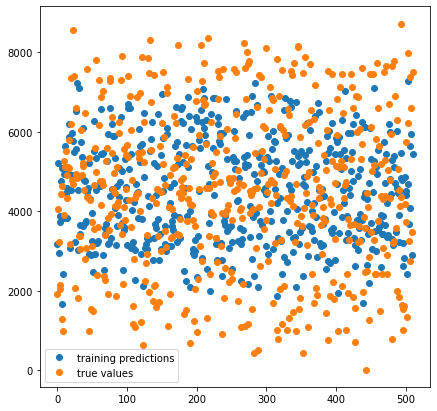

In [262]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(y_pred_train, linestyle = 'None', marker = 'o', label = 'training predictions')
ax.plot( y_train.to_numpy(), marker  = 'o',linestyle = 'None', label = 'true values')
ax.legend()
plt.show()

<h3> Select smaller training and cv sets to see effect of bias / variance </h3>

In [263]:
# Select smaller training and cv sets.

X_train, X_dummy, y_train, y_dummy = train_test_split(X_final, y, test_size=0.50, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.50, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')


training set size: 365 ||||| CV set size: 183


In [264]:
# Scale X values
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

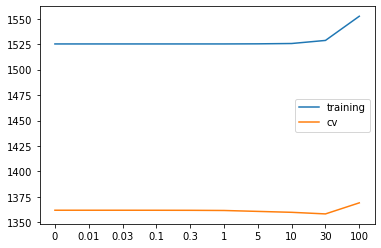

In [265]:
# Plot training error and cv error for a range of lambda values

alphas = [0, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(RMSE_train)
    cv_errors.append(RMSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

<h5> Two strange things happening: </h5>

- training error is higher than cv error 
- in the low bias region, the error doesn't change at all

<h3> Change the feature selection </h3>

<h5> Now we will try to use a few more features in the dataset </h5>

In [266]:
df_daily.head()

,Unnamed: 0,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
0,0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5.063729,5 to 15,2011-01,52
1,1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,3.837369,5 to 15,2011-01,52
2,2,2011-01-03,winter,2011,1,no,mon,yes,clear,1.2,-3.5,43.7,16.6,120,1229,1349,-9.780283,-5 to 5,2011-01,1
3,3,2011-01-04,winter,2011,1,no,tue,yes,clear,1.4,-2.0,59.0,10.7,108,1454,1562,-5.728918,-5 to 5,2011-01,1
4,4,2011-01-05,winter,2011,1,no,wed,yes,clear,2.7,-0.9,43.7,12.5,82,1518,1600,-8.415394,-5 to 5,2011-01,1


In [267]:
X = df_daily[['season', 'month', 'work_day', 'temp' ,'humidity']]

In [268]:
"""
Tried to one-hot encode using a vector for each season. 
Sklearn complained
"""
# seasons = ['winter', 'spring', 'summer', 'autumn']
# vals = np.array(seasons)
# vals = vals.reshape(len(vals), 1)
# encoder = OneHotEncoder()
# encoded_seasons = encoder.fit_transform(vals).toarray()
# encoded_seasons

# seasons_dict = dict(zip(seasons,encoded_seasons))
# seasons_dict

'\nTried to one-hot encode using a vector for each season. \nSklearn complained\n'

In [269]:
# Encode work_day
work_day_encoder = OneHotEncoder()
encoded_work_day = pd.DataFrame(work_day_encoder.fit_transform(X[['work_day']]).toarray())
encoded_work_day.columns = ['work_day_no', 'work_day_yes']
X_final = X.join(encoded_work_day)
X_final = X_final.drop(['work_day','work_day_no'], axis = 1)

# Encode season
season_encoder = OneHotEncoder()
encoded_season = pd.DataFrame(season_encoder.fit_transform(X[['season']]).toarray())
season_encoder.categories_
# autumn = 0, spring = 1, summer = 2, winter = 3
encoded_season.columns = ['autumn', 'spring', 'summer', 'winter']
X_final = X_final.join(encoded_season)

# Encode month
month_encoder = OneHotEncoder()
encoded_month = pd.DataFrame(month_encoder.fit_transform(X[['month']]).toarray())
month_encoder.categories_
encoded_month.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_final = X_final.join(encoded_month)
X_final




,season,month,temp,humidity,work_day_yes,autumn,spring,summer,winter,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,winter,1,8.2,80.6,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,winter,1,9.1,69.6,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,winter,1,1.2,43.7,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,winter,1,1.4,59.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,winter,1,2.7,43.7,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,winter,12,3.9,65.3,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,winter,12,3.9,59.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,winter,12,3.9,75.3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,winter,12,4.0,48.3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [270]:
X_final = X_final.drop(['season', 'month'], axis = 1)
X_final


,temp,humidity,work_day_yes,autumn,spring,summer,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,8.2,80.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.1,69.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.2,43.7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.4,59.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.7,43.7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,3.9,65.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,3.9,59.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,3.9,75.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,4.0,48.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h3> Create base model </h3>

In [271]:
# Now split X_final and y into train, cv, test data

# Training set: 70%
# CV set: 15%
# Test set: 15%

X_train, X_dummy, y_train, y_dummy = train_test_split(X_final, y, test_size=0.3, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.5, random_state = 101)

In [272]:
len (X_final), len (X_train), len(y_train), len(X_cv), len(y_cv), len(X_test), len(y_test)

(731, 511, 511, 110, 110, 110, 110)

In [273]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)
scaled_X_test = scaler.transform(X_test)

In [274]:
basic_model = Ridge()
basic_model.fit(scaled_X_train, y_train)
y_pred_train = basic_model.predict(scaled_X_train)
y_pred_cv = basic_model.predict(scaled_X_cv)

MSE_train = mean_squared_error(y_pred_train, y_train)
MSE_cv = mean_squared_error(y_pred_cv, y_cv)

MSE_train, MSE_cv

RMSE_train = np.sqrt(MSE_train)
RMSE_cv = np.sqrt(MSE_cv)
100*RMSE_cv / (df_daily['total'].mean())


# OK, using default values for ridge model, get around 70% accuracy.


30.547588645148505

<h3> Try out different regularisation parameters </h3>

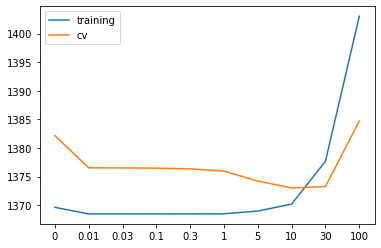

In [275]:
# Plot training error and cv error for a range of lambda values

alphas = [0, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(RMSE_train)
    cv_errors.append(RMSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

OK this looks more reasonable now.
- training error is lower than cv error at low regularisation regions. 
- training error is low with low bias, and blows up with high bias. 
- cv error starts high for low bias, reaches a trough in the middle, and then blows up again with high bias.

<h3> Improve bias hyper parameter even further </h3>

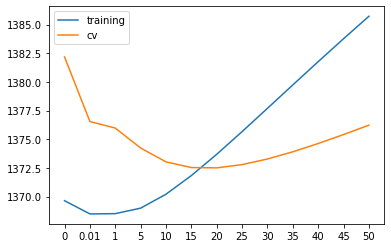

In [280]:
# Plot training error and cv error for a range of lambda values

alphas = [0, 0.01, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(RMSE_train)
    cv_errors.append(RMSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.legend()
plt.show()

It seems alpha = 15 is the optimal value

In [277]:
ridge_model = Ridge(alpha = 15)          # create linear reg. model, specifying lambda

ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

MSE_train = mean_squared_error (y_pred_train, y_train)
RMSE_train = np.sqrt(MSE_train)

MSE_cv = mean_squared_error (y_pred_cv, y_cv)
RMSE_cv = np.sqrt(MSE_cv)

100*RMSE_cv/(df_daily['total'].mean())

30.471189700933913

In [278]:
# OK. So, accuracy still doesn't really improve. Still at around 70%

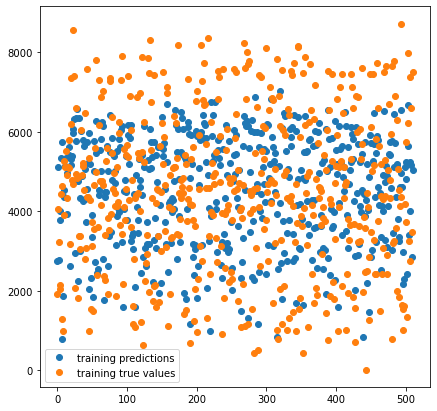

In [279]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(y_pred_train, linestyle = 'None', marker = 'o', label = 'training predictions')
ax.plot( y_train.to_numpy(), marker  = 'o',linestyle = 'None', label = 'training true values')
ax.legend()
plt.show()